## Banking Dataset - Marketing Targets
Banking Dataset of different customers to predict if they will convert or not.

#### Context
Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing, and digital marketing.

Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit (variable y).

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Bank Marketing EDA, preprocessing and modeling

In [2]:
# Importing commonly used libraries for data visualization and handling
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Suppress warnings to keep the output clean
import warnings
warnings.filterwarnings('ignore')

read the dataset and add it to a dataframe df

In [3]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv('train.csv' , sep=";")

In [4]:
df.shape

(45211, 17)

In [5]:
# Display the first few rows of the DataFrame
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


* Based on the information from the previous two cells, we learn that the dataset contains data on 45,211 bank customers. Each customer record includes information such as age, job, and 15 additional details, which are listed below (column names).

* Additionally, there are some missing values in the job, education, contact, and poutcome columns, represented by the term "unknown." These missing values are present in 10 rows, as indicated earlier. To identify all missing values in the dataset, further exploration is necessary.

* Lastly, we need to clarify the time unit used in the duration column. It appears that the unit is in seconds.

print the names of columns

* We have a dataset with 17 columns, each representing a distinct characteristic of our customers.

In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

**Data Types and Non-Null Counts**

* The dataset contains 10 categorical features and 7 numeric features.
* There are no null values in any of the columns; however, some columns do have missing values.

In [8]:
# Get summary of dataset structure and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


count of uniques of each column

In [9]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

Descriptive statistics of numeric columns

In [10]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Descriptive statistics of categorical columns

In [11]:
df.describe(include = ["object"])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


**Age column**


* The age of customers ranges from a minimum of 18 to a maximum of 95, as shown by `df.describe()`.
* To count the number of customers for each age, the range of ages (from 18 to 95) gives us \(95 - 18 + 1\) total bins.
* Most customers are aged between 25 and 60.
* The boxplot indicates that ages above 70 are considered outliers.
* The final histogram displays the distribution of ages while excluding these outliers.

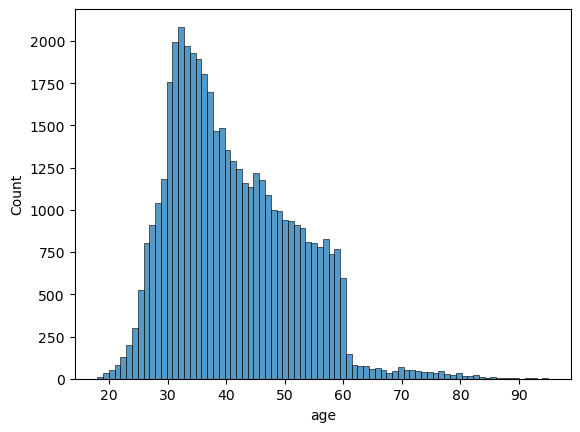

In [12]:
# Create a visualization using seaborn
sns.histplot(df["age"] , bins = 95-18+1)
plt.show()

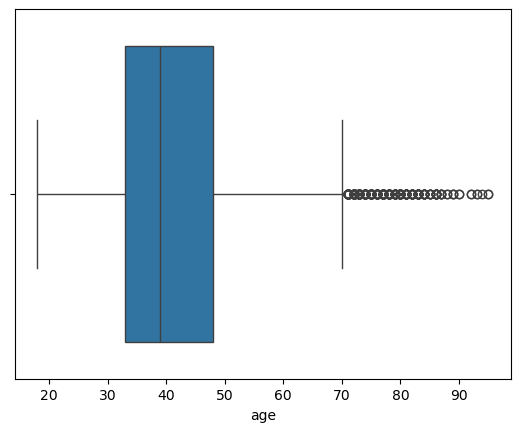

In [13]:
sns.boxplot(df["age"], orient = "h")
plt.show()

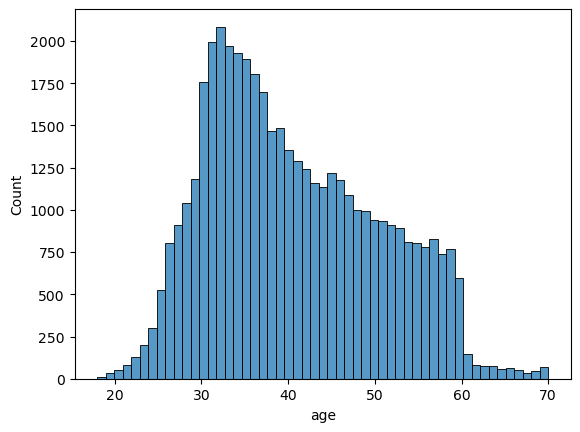

In [14]:
new_age = df["age"][df["age"]<= 70]
sns.histplot(new_age, bins = 70-18+1)
plt.show()

**Job column**

- The blue-collar category has the highest count of jobs.
- There is an "unknown" category for jobs, which can be treated as a missing value, and it has the lowest count.
- After "unknown," the "student" category has the second lowest count.

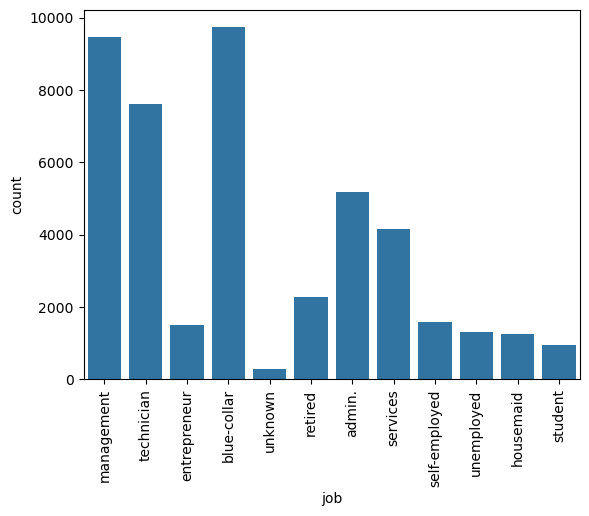

In [15]:
sns.countplot(df, x="job")
plt.xticks(rotation=90)
plt.show()

**Marital column**

- Among marital statuses, "married" has the highest count, followed by "single" and "divorced" in that order.

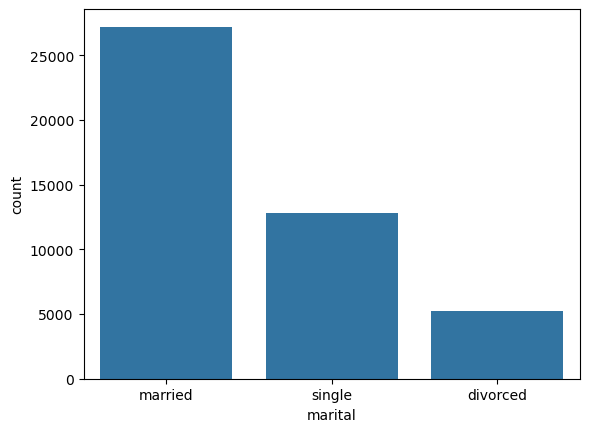

In [16]:
sns.countplot(df, x = "marital")
plt.show()

**Education column**

- The secondary education category has the highest count.
- Similar to jobs, there is an "unknown" category for education that represents a missing value and has the lowest count.
- After "unknown," the "primary" education category has the second lowest count.

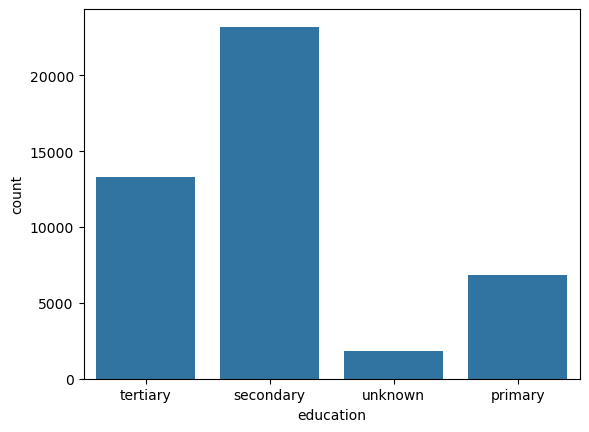

In [17]:
sns.countplot(df, x = "education")
plt.show()

**Default column**

* This column tells us if a customer has credit in default or not.
* it is obvious that most of the customers have no default credits.

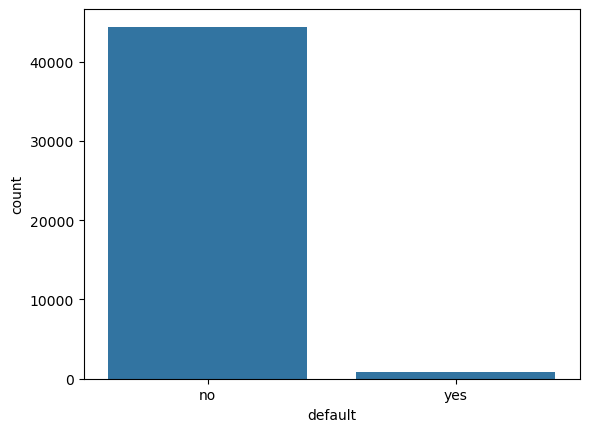

In [18]:
sns.countplot(df, x= "default")
plt.show()

**balance column**

* This column shows how much money each customer has on average in a year.
* according to descriptive statistics of this column printed above, the minimum is -8019, maximum is 102127, mean is almost 1362 and the std is 3044. these statistical parameters show that this column has variety of values and alot of outliers.
* according to histogram and boxplot below, we can see frequency of the values and find the outliers.
* the last plot is the histogram of balance column after ignoring the outliers shown in the boxplot.

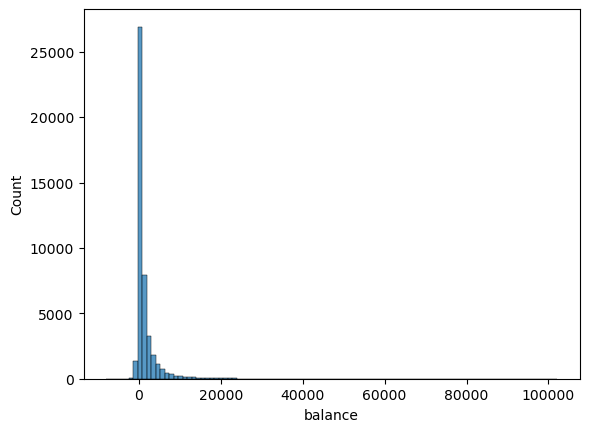

In [19]:
sns.histplot(df["balance"] , bins = 100)
plt.show()

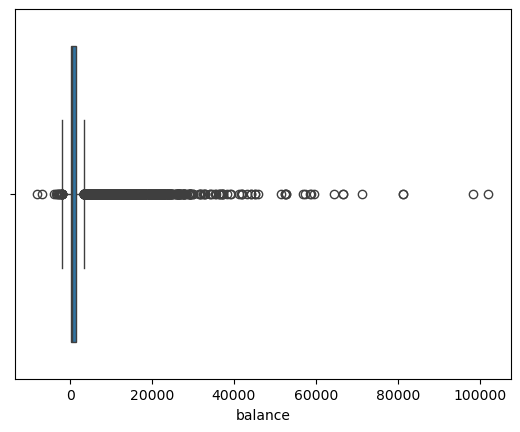

In [20]:
sns.boxplot(df["balance"], orient ="h")
plt.show()

Now we have to identify or filter out outliers in the balance column based on these thresholds, which helps improve the accuracy and robustness of our machine learning models.

In [21]:
balance_data = df["balance"]

Q1 = np.percentile(balance_data, 25)
Q3 = np.percentile(balance_data, 75)

IQR = Q3 - Q1

lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

print("Lower whisker:", lower_whisker)
print("Upper whisker:", upper_whisker)

Lower whisker: -1962.0
Upper whisker: 3462.0


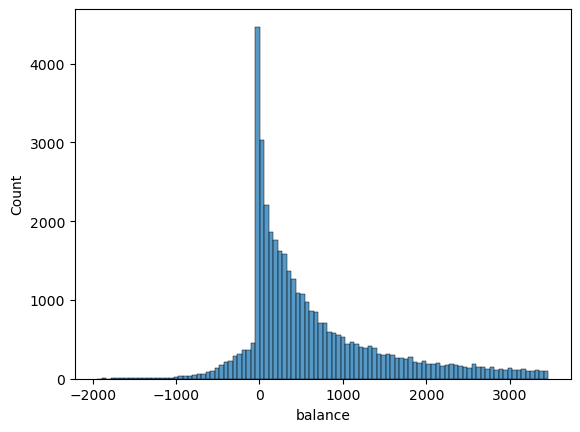

In [22]:
sns.histplot(df["balance"][(df["balance"] >= -1962) & (df["balance"] <= 3462)])
plt.show()

**housing column**

* this column shows if a customer has a housing loan or not.
* we can see that the proportion of people having a housing loan is more than others (55.6% vs 44.4%).

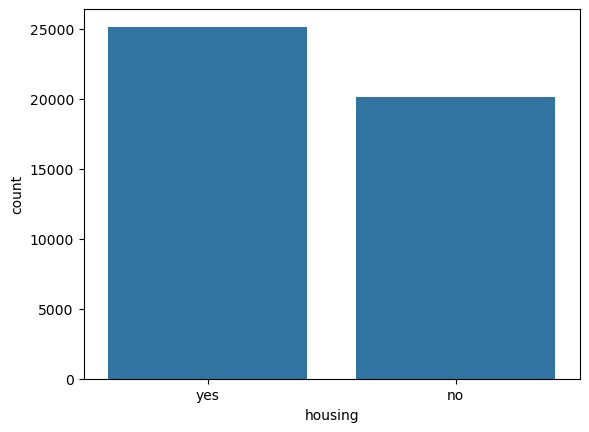

In [23]:
sns.countplot(df, x = "housing")
plt.show()

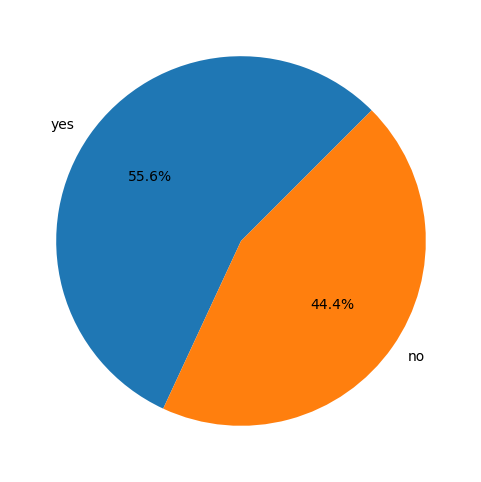

In [24]:
# Count the occurrences of each unique value
housing_counts = df['housing'].value_counts()
plt.figure(figsize = (6,6))
plt.pie(housing_counts, labels=housing_counts.index, autopct='%1.1f%%', startangle=45)
plt.show()

**loan column**

- This column tells us if a customer has a personal loan.
- Most people (about 84%) do not have a housing loan, while only 16% do.

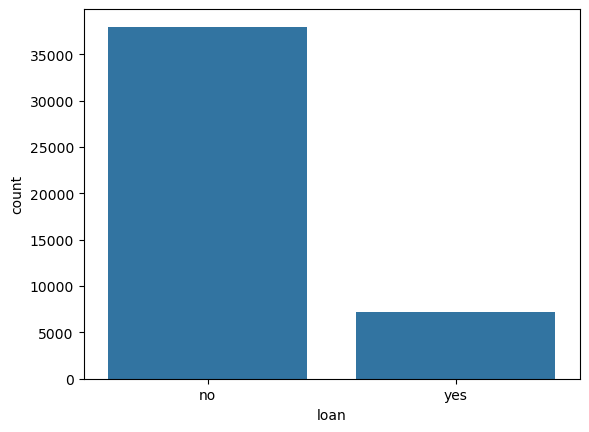

In [25]:
sns.countplot(df , x = "loan")
plt.show()

In [26]:
df["loan"].value_counts(normalize=True) * 100

loan
no     83.977351
yes    16.022649
Name: proportion, dtype: float64

**contact column**

- this column shows contact communication type
- There are some "unknown" parts which mean we have missing values.
- Most customers are contacted by cellphone.

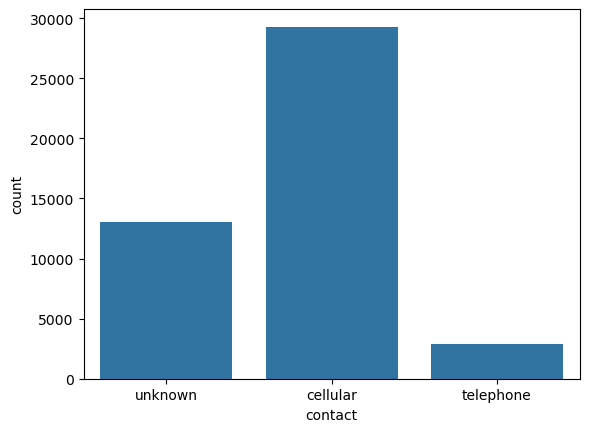

In [27]:
sns.countplot(df, x = "contact")
plt.show()

**day column**

* This column shows the last day of the month when customers were contacted.
* There’s no specific pattern in this column.

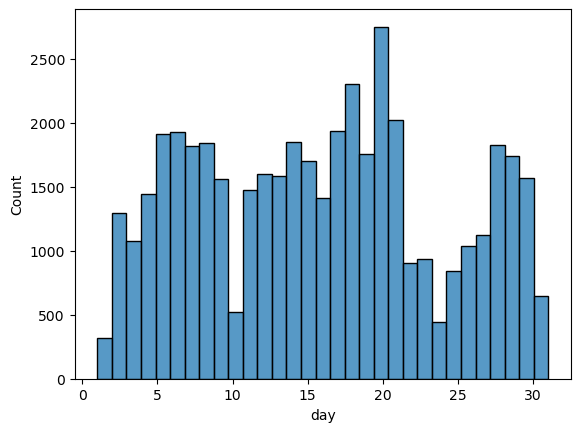

In [28]:
sns.histplot(df["day"], bins = 31)
plt.show()

**month column**

- This column shows the last month of the year when customers were contacted.
- May is the month with the most frequency.
- December is the month with the fewest frequency.

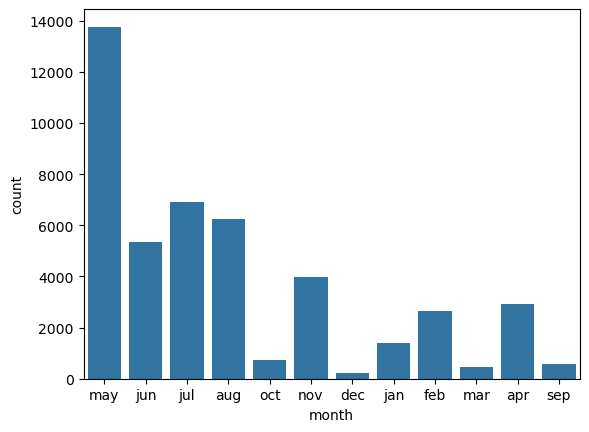

In [29]:
sns.countplot(df, x = "month")
plt.show()

**duration column**

* this column indicates the last contact duration for a customer.
* according to descriptive statistics of this column printed above, the minimum is 0, maximum is 4918, mean is almost 258 and the std is 257. these statistical parameters show that this column has variety of values and alot of outliers.
* according to histogram and boxplot below, we can see frequency of the values and find the outliers.
* the last plot is the histogram of duration column after ignoring the outliers shown in the boxplot.

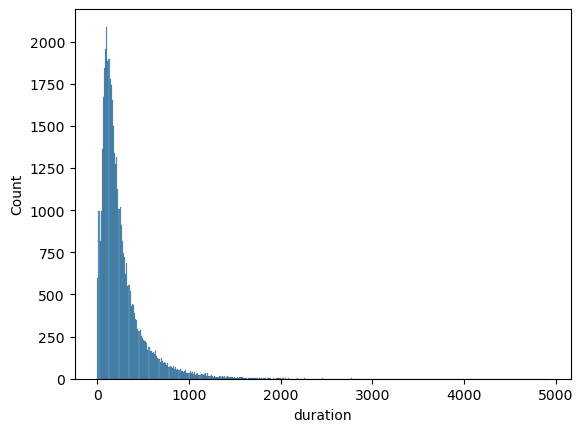

In [30]:
sns.histplot(df["duration"])
plt.show()

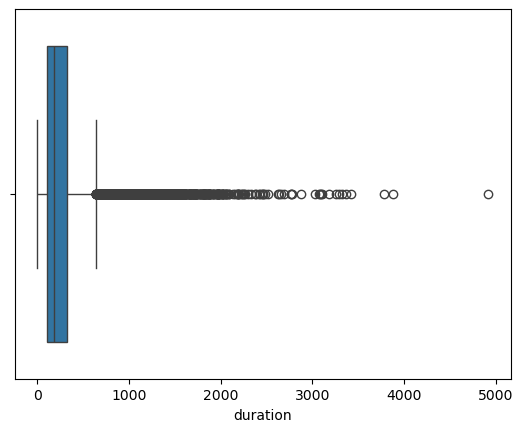

In [31]:
sns.boxplot(df["duration"] , orient = "h")
plt.show()

In the context of the balance column:

* 643.0 is the upper threshold for what is considered a “normal” value.
* Any balance value greater than 643.0 is considered an outlier—a value that is unusually high compared to the rest of the data.

In [32]:
duration_data = df["duration"]

Q1 = np.percentile(duration_data, 25)
Q3 = np.percentile(duration_data, 75)

IQR = Q3 - Q1
upper_whisker = Q3 + 1.5 * IQR

print("Upper whisker:", upper_whisker)

Upper whisker: 643.0


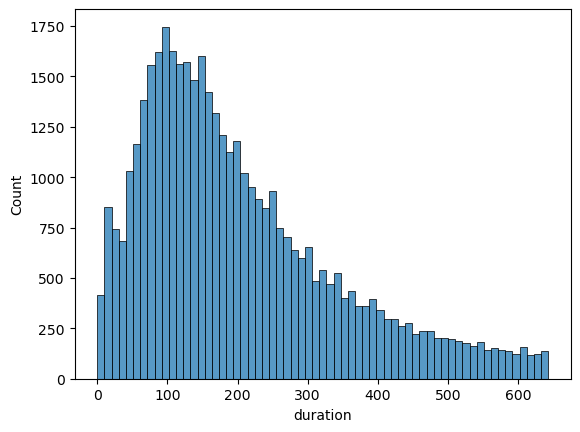

In [33]:
sns.histplot(df["duration"][df["duration"] <= 643])
plt.show()

**campaign column**

* this column shows number of contacts performed during this campaign and for this customer.
* according to descriptive statistics of this column printed above, the minimum is 1, maximum is 63, mean is almost 2.76 and the std is almost 3.
* according to histogram and boxplot below, we can see frequency of the values and find the outliers.
* the last plot is the histogram of duration column after ignoring the outliers shown in the boxplot.

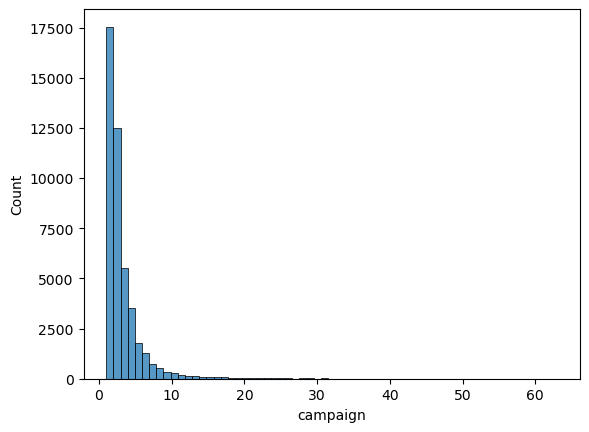

In [34]:
sns.histplot(df["campaign"], bins = 63)
plt.show()

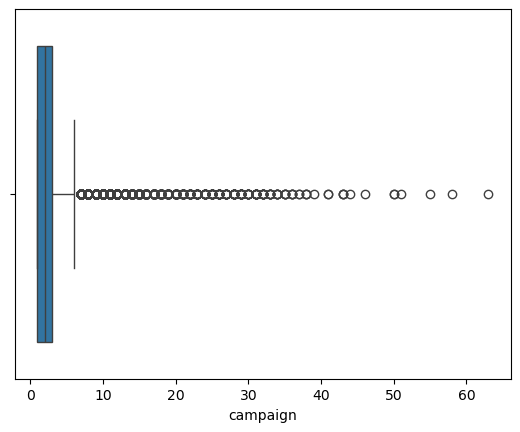

In [35]:
sns.boxplot(df["campaign"], orient = "h")
plt.show()

Values greater than 6.0 in that column are considered outliers.
Any data point higher than 6.0 is unusually high compared to the rest of the data distribution.

In [36]:
duration_data = df["campaign"]

Q1 = np.percentile(duration_data, 25)
Q3 = np.percentile(duration_data, 75)

IQR = Q3 - Q1
upper_whisker = Q3 + 1.5 * IQR

print("Upper whisker:", upper_whisker)

Upper whisker: 6.0


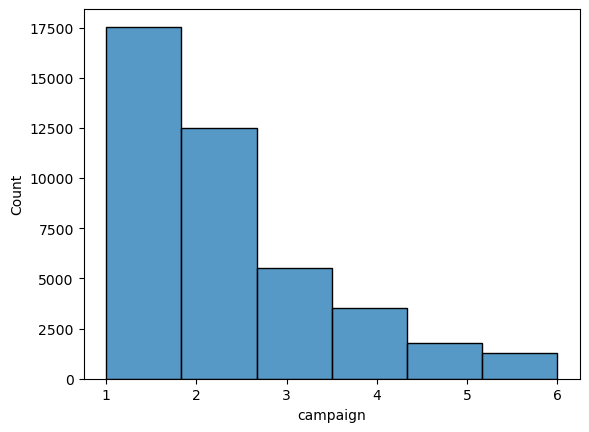

In [37]:
sns.histplot(df["campaign"][df["campaign"] <= 6] , bins=6)
plt.show()

**pdays column**

* this column shows the number of days that passed by after the client was last contacted from a previous campaign.
* -1 means client was not previously contacted.

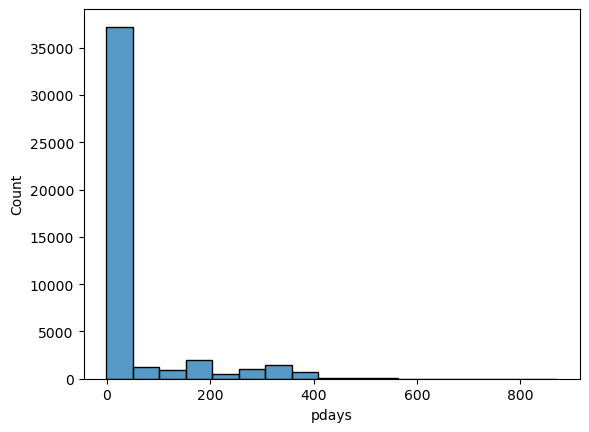

In [38]:
sns.histplot(df["pdays"])
plt.show()

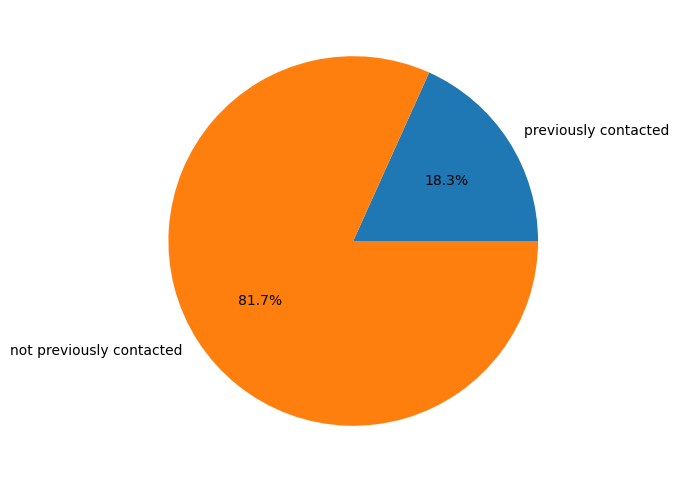

In [39]:
positive_pdays_count = df["pdays"][df["pdays"] > -1].count()
negative_pdays_count = df["pdays"][df["pdays"] == -1].count()

labels = ['previously contacted', "not previously contacted"]
counts = [positive_pdays_count, negative_pdays_count]

plt.figure(figsize=(8, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.show()

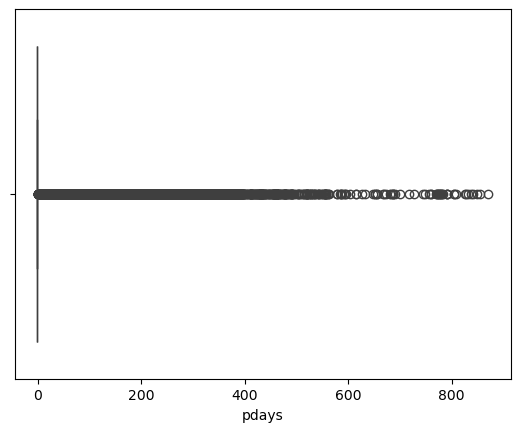

In [40]:
sns.boxplot(df["pdays"] , orient = "h")
plt.show()

In [41]:
pdays_data = df["pdays"]

Q1 = np.percentile(pdays_data, 25)
Q3 = np.percentile(pdays_data, 75)

IQR = Q3 - Q1

lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower whisker:", lower_whisker)
print("Upper whisker:", upper_whisker)

Q1: -1.0
Q3: -1.0
IQR: 0.0
Lower whisker: -1.0
Upper whisker: -1.0


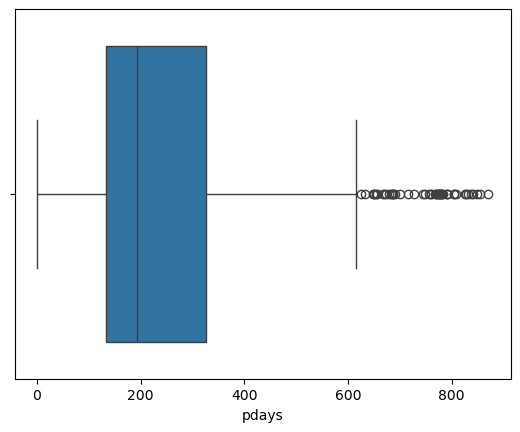

In [42]:
sns.boxplot(x = df["pdays"][df["pdays"] > -1] , orient="h")
plt.show()

In [43]:
new_pdays_data = df["pdays"][df["pdays"] > -1]

Q1 = np.percentile(new_pdays_data, 25)
Q3 = np.percentile(new_pdays_data, 75)

IQR = Q3 - Q1

upper_whisker = Q3 + 1.5 * IQR

print("Upper whisker:", upper_whisker)

Upper whisker: 618.0


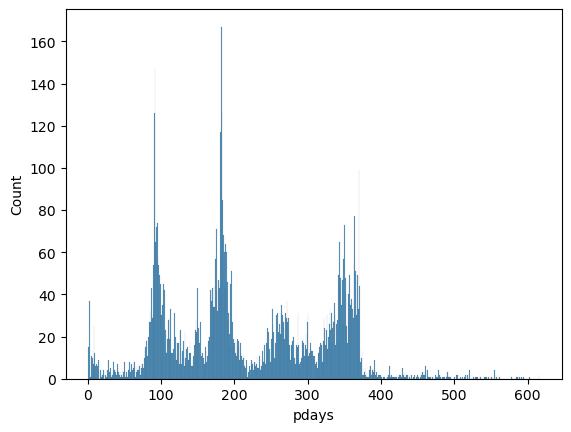

In [44]:
sns.histplot(df["pdays"][(df["pdays"] > -1) &(df["pdays"] <= 618 )] , bins = 619)
plt.show()

**previous column**

* this column shows the number of contacts performed before this campaign and for this client

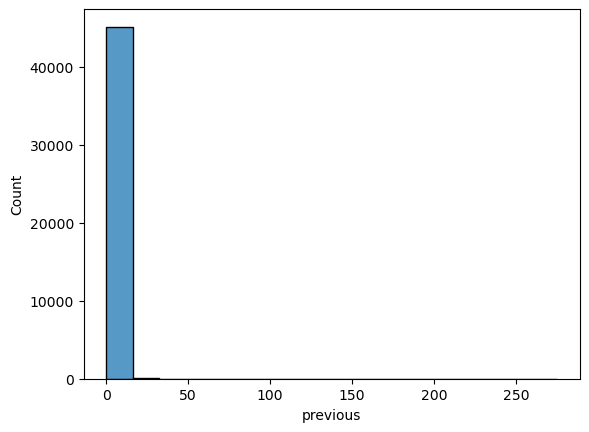

In [45]:
sns.histplot(df["previous"])
plt.show()

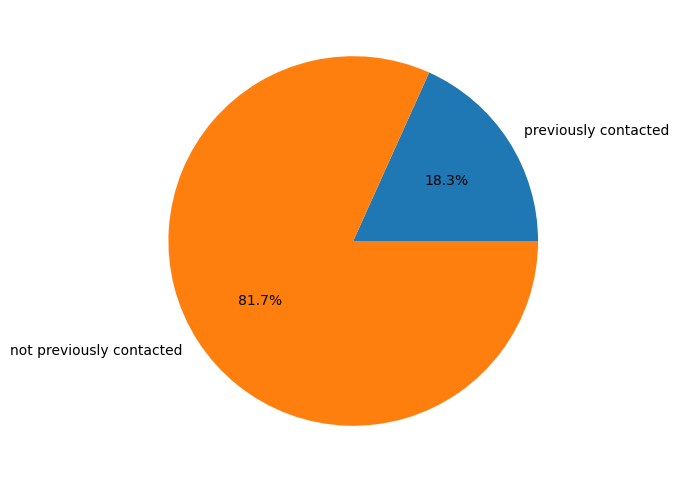

In [46]:
positive_previous_count = df["previous"][df["previous"] > 0].count()
zero_previous_count = df["previous"][df["previous"] == 0].count()

labels = ['previously contacted', "not previously contacted"]
counts = [positive_previous_count, zero_previous_count]

plt.figure(figsize=(8, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.show()

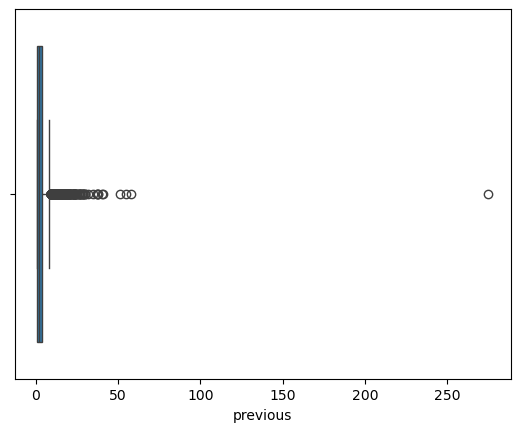

In [47]:
sns.boxplot(x = df["previous"][df["previous"] > 0] , orient="h")
plt.show()

The result indicates that for the duration column:

* The IQR method calculates 8.5 as the upper threshold.
* Any value greater than 8.5 is considered an outlier in the context of this column.

In [48]:
new_previous_data = df["previous"][df["previous"] > 0]

Q1 = np.percentile(new_previous_data, 25)
Q3 = np.percentile(new_previous_data, 75)

IQR = Q3 - Q1

upper_whisker = Q3 + 1.5 * IQR

print("Upper whisker:", upper_whisker)

Upper whisker: 8.5


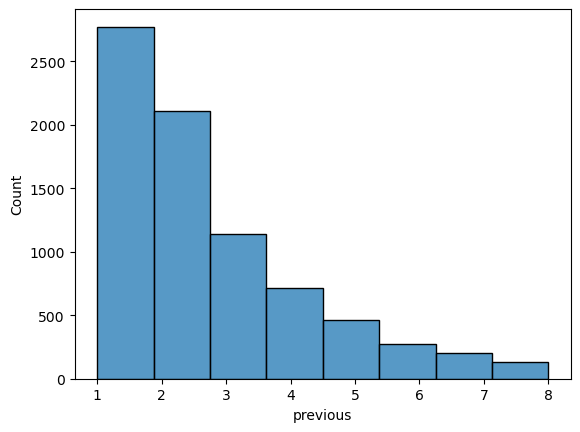

In [49]:
sns.histplot(df["previous"][(df["previous"] > 0) &(df["previous"] <= 8 )] , bins = 8)
plt.show()

* according to the pdays and previous columns plots, it is obvious that if we consider these 2 columns as categorical features ( I mean grouping the people by being previously contacted or not, they are corresponded to each other.

**poutcome column**

* this column shows the outcome of the previous marketing campaign
* "unknown" means that majority (81.74%) of the people did not know about the previous marketing campaign. so this "unknown" cannot be considered as missing value.

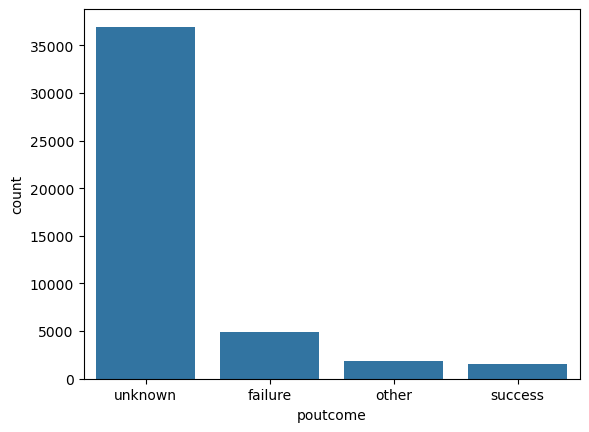

In [50]:
sns.countplot(df , x = "poutcome")
plt.show()

In [51]:
df["poutcome"].value_counts(normalize = True)*100

poutcome
unknown    81.747805
failure    10.840282
other       4.069806
success     3.342107
Name: proportion, dtype: float64

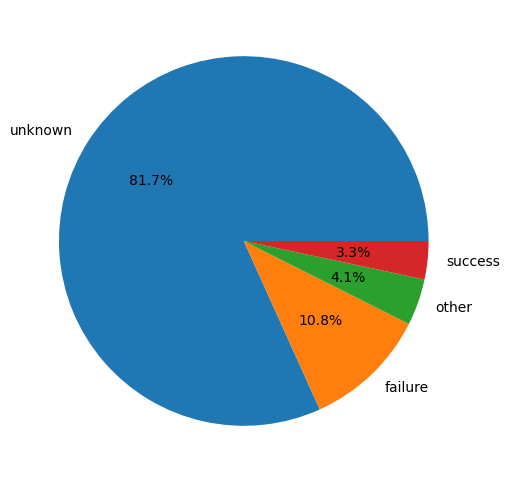

In [52]:
# Count the occurrences of each unique value
poutcome_counts = df['poutcome'].value_counts()
plt.figure(figsize = (6,6))
plt.pie(poutcome_counts, labels=poutcome_counts.index, autopct='%1.1f%%')
plt.show()

**y column**

* this column shows whether the client subscribed a term deposit or not.
* The target variable is highly imbalanced.

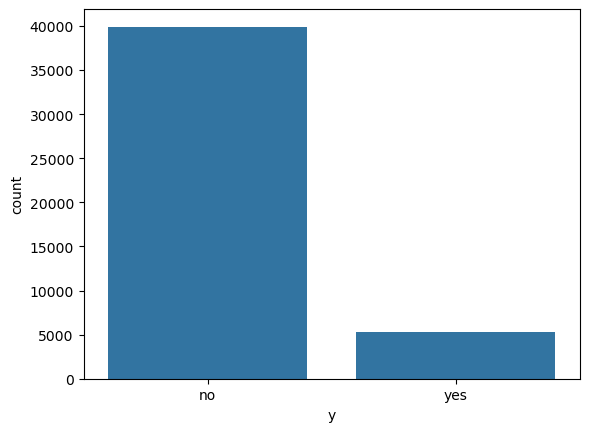

In [53]:
sns.countplot(df , x = "y")
plt.show()

In [54]:
# Count the occurrences of each unique value
df["y"].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

**bivariate**
* there is no significant correlation between features.
* the one worth noting is the 0.45 correlation between pdays and previous which i have explained the reason before.
* also the there is a 0.39 correlation between duration and target variable.

In [55]:
df_copy = df.copy()
df_copy['y'] = df_copy['y'].replace({"yes": 1 , "no": 0})
numeric_data = df_copy.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
correlation_matrix

,age,balance,day,duration,campaign,pdays,previous,y
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
y,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


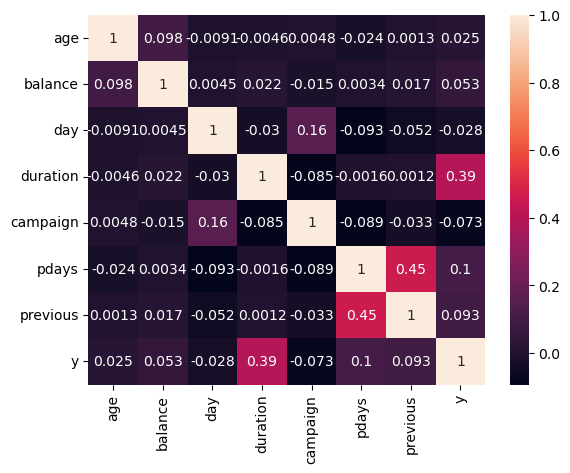

In [56]:
# Create a heatmap to visualize correlations or missing values
sns.heatmap(correlation_matrix, annot =True)
plt.show()

## preprocessing

In [57]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

**missing value handling**
* handling "unknown" values mentioned before by replacing them with mode of each column.

In [58]:
df["job"].replace(["unknown"],df["job"].mode(),inplace = True)
df["education"].replace(["unknown"],df["education"].mode(),inplace = True)
df["contact"].replace(["unknown"],df["contact"].mode(),inplace = True)

encoding  
convert yes/no to 1/0

In [59]:
df['default'] = df['default'].replace({"yes": 1 , "no": 0})
df['housing'] = df['housing'].replace({"yes": 1 , "no": 0})
df['loan'] = df['loan'].replace({"yes": 1 , "no": 0})
df['y'] = df['y'].replace({"yes": 1 , "no": 0})

convert previous to 1/0 and dropping pdays

In [60]:
df['previous'] = df['previous'].apply(lambda x: 0 if x == 0 else 1)
df.drop(columns=['pdays'], inplace=True)

label encoding of the ordinal categorical features (education and month)

In [61]:
df['education'] = df['education'].replace({"tertiary": 2 , "secondary": 1 , "primary" :0})

In [62]:
df['month'] = df['month'].replace({"jan": 1, "feb": 2, "mar" :3,
                                   "apr":4 ,"may": 5, "jun":6,
                                   "jul":7 , "aug":8, "sep": 9,
                                   "oct": 10, "nov": 11 , "dec":12})

one hot encoding of the remaining categorical features

In [63]:
df = pd.get_dummies(df, columns=["job", "marital", "poutcome" , "contact"]  , drop_first = True , dtype = int )

In [64]:
df.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,poutcome_other,poutcome_success,poutcome_unknown,contact_telephone
0,58,2,0,2143,1,0,5,5,261,1,...,0,0,0,0,1,0,0,0,1,0
1,44,1,0,29,1,0,5,5,151,1,...,0,0,1,0,0,1,0,0,1,0
2,33,1,0,2,1,1,5,5,76,1,...,0,0,0,0,1,0,0,0,1,0
3,47,1,0,1506,1,0,5,5,92,1,...,0,0,0,0,1,0,0,0,1,0
4,33,1,0,1,0,0,5,5,198,1,...,0,0,0,0,0,1,0,0,1,0


**Scaling**
* use minmax scaler

In [65]:
columns = df.columns 
scaler = MinMaxScaler()
# Apply transformation to encode categorical features
df = scaler.fit_transform(df)
df = pd.DataFrame(df , columns=[columns])

In [66]:
df.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,poutcome_other,poutcome_success,poutcome_unknown,contact_telephone
0,0.519481,1.0,0.0,0.092259,1.0,0.0,0.133333,0.363636,0.053070,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.337662,0.5,0.0,0.073067,1.0,0.0,0.133333,0.363636,0.030704,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.194805,0.5,0.0,0.072822,1.0,1.0,0.133333,0.363636,0.015453,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.376623,0.5,0.0,0.086476,1.0,0.0,0.133333,0.363636,0.018707,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.194805,0.5,0.0,0.072812,0.0,0.0,0.133333,0.363636,0.040260,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


**data augmentation since the dataset is not balanced**
* use SMOTE on only train data since test results should be based on real data.

In [67]:
y = df["y"]
X = df.drop("y" , axis = 1)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [68]:
sm = SMOTE()
X_train , y_train = sm.fit_resample(X_train, y_train)
y_train.value_counts()

(y,)
0.0     31970
1.0     31970
Name: count, dtype: int64

In [69]:
y_test.value_counts()

(y,)
0.0     7952
1.0     1091
Name: count, dtype: int64

In [70]:
X_train.shape

(63940, 27)

**Modeling and Evaluation**

In [71]:
# Import logistic regression model from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
# Calculate the accuracy of predictions
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
# Import random forest classifier from sklearn
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

utility function for plotting confusion matrix

In [72]:
def plot_confusion_matrix(y_test , y_pred):
    cm = confusion_matrix(y_test, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] 
    sns.heatmap(cm_norm, annot=cm, cmap='Blues', fmt='d', cbar=False)  
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show() 

**logistic regression**

In [73]:
lr_model = LogisticRegression(max_iter=200 , random_state = 42)
lr_model.fit(X_train,y_train)
y_predlr = lr_model.predict(X_test)

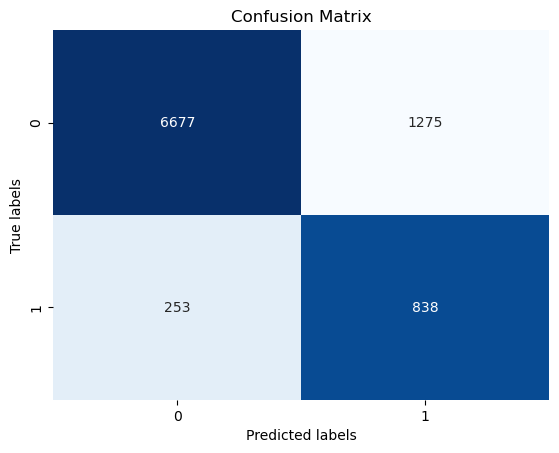

              precision    recall  f1-score   support

         0.0       0.96      0.84      0.90      7952
         1.0       0.40      0.77      0.52      1091

    accuracy                           0.83      9043
   macro avg       0.68      0.80      0.71      9043
weighted avg       0.90      0.83      0.85      9043



In [74]:
plot_confusion_matrix(y_test, y_predlr)
print(classification_report(y_test, y_predlr))

**support vector machine**
* this algorithm is so time consuming on this dataset compared to other ones.

In [75]:
svc_model = SVC(random_state = 42)
svc_model.fit(X_train, y_train)
y_predsvc = svc_model.predict(X_test)

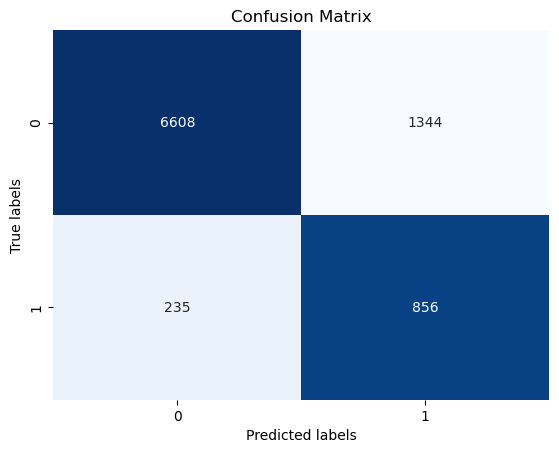

              precision    recall  f1-score   support

         0.0       0.97      0.83      0.89      7952
         1.0       0.39      0.78      0.52      1091

    accuracy                           0.83      9043
   macro avg       0.68      0.81      0.71      9043
weighted avg       0.90      0.83      0.85      9043



In [76]:
plot_confusion_matrix(y_test , y_predsvc)
print(classification_report(y_test, y_predsvc))

**Random forest**

In [77]:
# Import random forest classifier from sklearn
rf_model = RandomForestClassifier(n_estimators = 100 , random_state = 42)
rf_model.fit(X_train, y_train)
y_predrf = rf_model.predict(X_test)

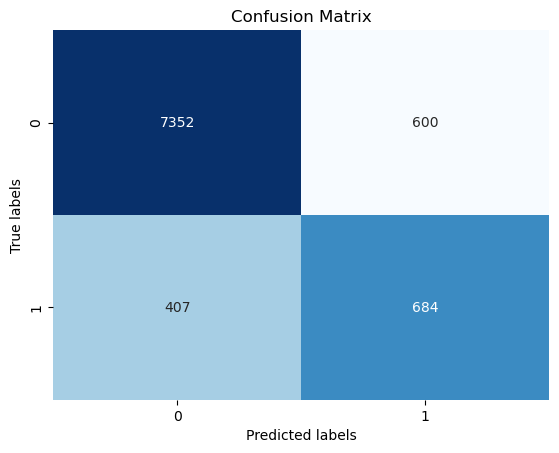

              precision    recall  f1-score   support

         0.0       0.95      0.92      0.94      7952
         1.0       0.53      0.63      0.58      1091

    accuracy                           0.89      9043
   macro avg       0.74      0.78      0.76      9043
weighted avg       0.90      0.89      0.89      9043



In [78]:
plot_confusion_matrix(y_test , y_predrf)
print(classification_report(y_test, y_predrf))

**k nearest neighbor**

In [79]:
knn_model = KNeighborsClassifier(n_neighbors = 4)
knn_model.fit(X_train, y_train)
y_predknn = knn_model.predict(X_test)

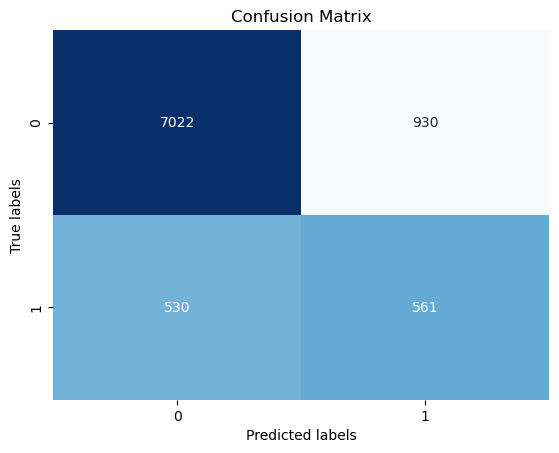

              precision    recall  f1-score   support

         0.0       0.93      0.88      0.91      7952
         1.0       0.38      0.51      0.43      1091

    accuracy                           0.84      9043
   macro avg       0.65      0.70      0.67      9043
weighted avg       0.86      0.84      0.85      9043



In [80]:
plot_confusion_matrix(y_test , y_predknn)
print(classification_report(y_test, y_predknn))

**xgboost**

In [81]:
xgb_model = xgb.XGBClassifier(eta = 0.25 , n_estimator = 100 , max_depth = 6, random_stare = 42)
xgb_model.fit(X_train, y_train)
y_predxgb = xgb_model.predict(X_test)

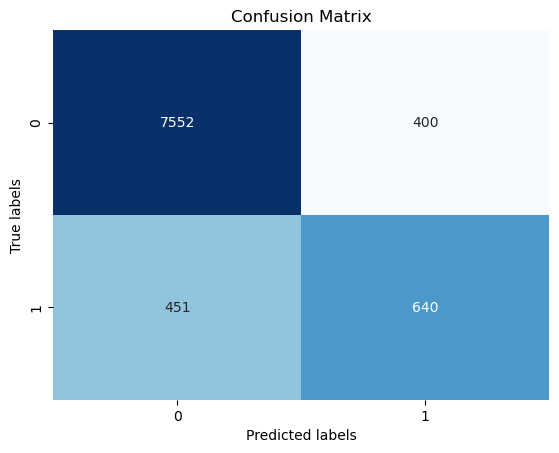

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95      7952
         1.0       0.62      0.59      0.60      1091

    accuracy                           0.91      9043
   macro avg       0.78      0.77      0.77      9043
weighted avg       0.90      0.91      0.90      9043



In [82]:
plot_confusion_matrix(y_test , y_predxgb)
print(classification_report(y_test, y_predxgb))

**adaboost**

In [83]:
adb_model = AdaBoostClassifier(n_estimators=100,random_state=42)
adb_model.fit(X_train, y_train)
y_predadb = adb_model.predict(X_test)

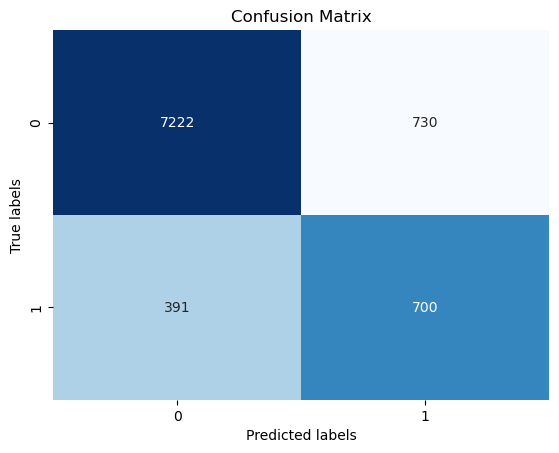

              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93      7952
         1.0       0.49      0.64      0.56      1091

    accuracy                           0.88      9043
   macro avg       0.72      0.77      0.74      9043
weighted avg       0.89      0.88      0.88      9043



In [84]:
plot_confusion_matrix(y_test , y_predadb)
print(classification_report(y_test, y_predadb))

**Decision tree**

In [85]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_preddt = adb_model.predict(X_test)

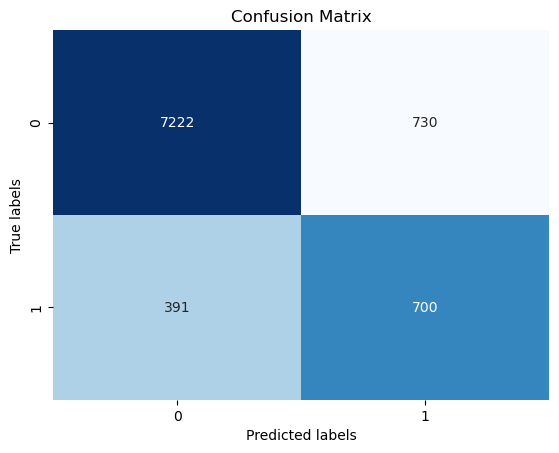

              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93      7952
         1.0       0.49      0.64      0.56      1091

    accuracy                           0.88      9043
   macro avg       0.72      0.77      0.74      9043
weighted avg       0.89      0.88      0.88      9043



In [86]:
plot_confusion_matrix(y_test , y_preddt)
print(classification_report(y_test, y_preddt))

* it is obvious that the best result is for xgboost with 0.91 accuracy and 0.77 f1-macro.
* low metrics on class 1 is possibly due to highly unbalanced dataset.